<a href="https://www.kaggle.com/code/tarizatique/fandango-project?scriptVersionId=107021159" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fandango-rating-discrepancy/all_sites_scores.csv
/kaggle/input/fandango-rating-discrepancy/fandango_scrape.csv
/kaggle/input/fandango-scrapecsv/fandango_scrape.csv


# [Fandango Project](http://)

# Overview
if you are planning on going out to see a movie,how well ca you trust online reviews and ratings?Especially if the same company showing rating also makes money by selling movie ticktes. Do they have a bias towards rating movies higher than they should be rated




# Goal:
**Your goal is to complete the task below based off the 538 article and see if you reach a similar conclusion.you will need to use your pandas and visualisation skills to determine if Fandango's ratings in 2015 had a bias rating movies better to sell more tickets**

# Part One : Understanding the Background and Data

 **Task: Read this artcile :** [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](https://fivethirtyeight.com/features/fandango-movies-ratings/)

**Task: After Reading the article , read these two tables giving an overview of the two .csv files we will be working with:**

**The Data**

**This is the data behind the story[ Be Suspicious Of Online Movie Ratings, Especially Fandango’s](https://fivethirtyeight.com/features/fandango-movies-ratings/).There are two csv files one with Fandango Stars and Displayed Ratings , and the other with aggregate data for movie ratings from other sites , Metacritic , IMDB and Rotten Tomatoes.**

**all_sites_score.csv and fandango_scrape.csv**

**Importing libraries we will use:**

In [2]:
import pandas as pd 

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Part  Two: Exploring Fandango Displayed Scores versus True USer Ratings

Let's first explore the Fandango rating to see if our analysis agrees with the article's conclusion.



In [3]:
fandango = pd.read_csv("../input/fandango-rating-discrepancy/fandango_scrape.csv")

**Exploring the DataFrame Properties and Head.**

In [4]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
fandango.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Let's Explore the realationship between popularity of a film and its rating .Creating a scatter plot showing the relationship between rating and votes** 

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

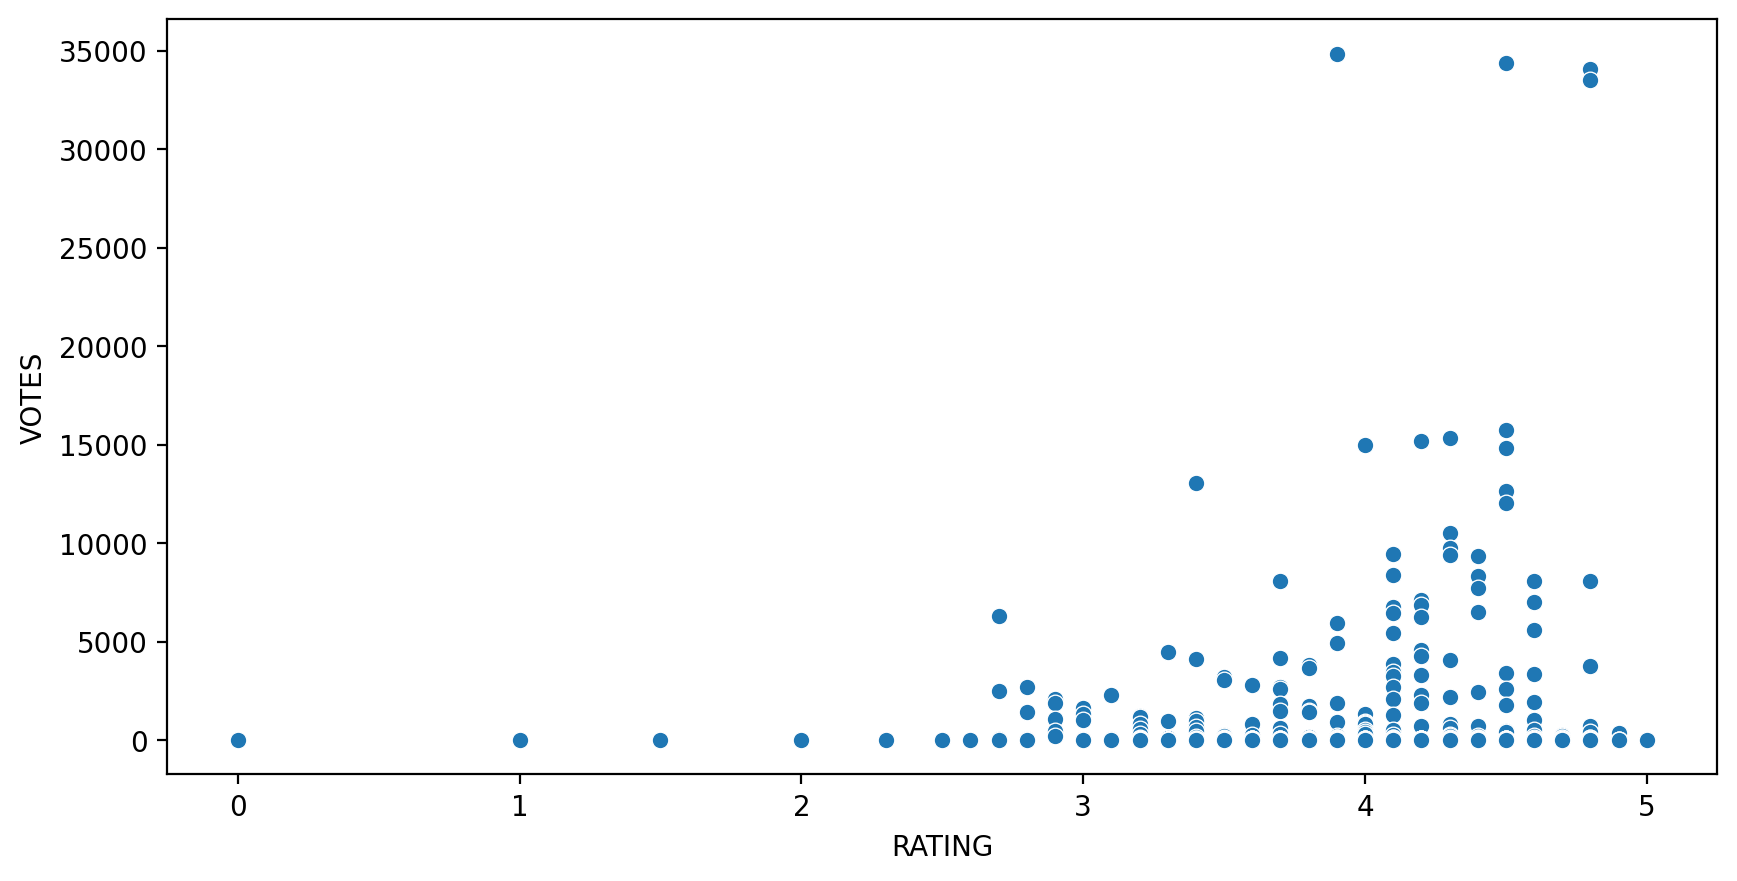

In [7]:
plt.figure(figsize =(10,5),dpi=200)

sns.scatterplot(data=fandango,x="RATING",y="VOTES")

**Calculating the Correlation**

In [8]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Assuming that every row in the FILM title column has the same format:**

Film Title Name (Year)

**Create a new column that is able to strip  the year from the title strings and set this new column as YEAR**

In [9]:
title =  'Film Title NAme (Year)'

In [10]:
title.split('(')[-1].replace(')','')

'Year'

In [11]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1].replace(')',''))

In [12]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


**Checking how many movies are in the Fandango DataFrame per Year**

In [13]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

**visualising the count movies per year**

<AxesSubplot:xlabel='YEAR', ylabel='count'>

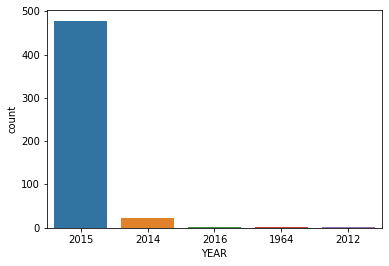

In [14]:
sns.countplot(data=fandango,x='YEAR')

In [15]:
#10 movies highest number of votes
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [16]:
#movies with zzero votes
no_votes = fandango['VOTES'] == 0
no_votes.sum()

69

In [17]:
#creating a dataframe of on;y reviewed film by removing all films having zero votes.
fan_reviewed = fandango[fandango['VOTES']>0]

**As noted in the article , due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distribution.**



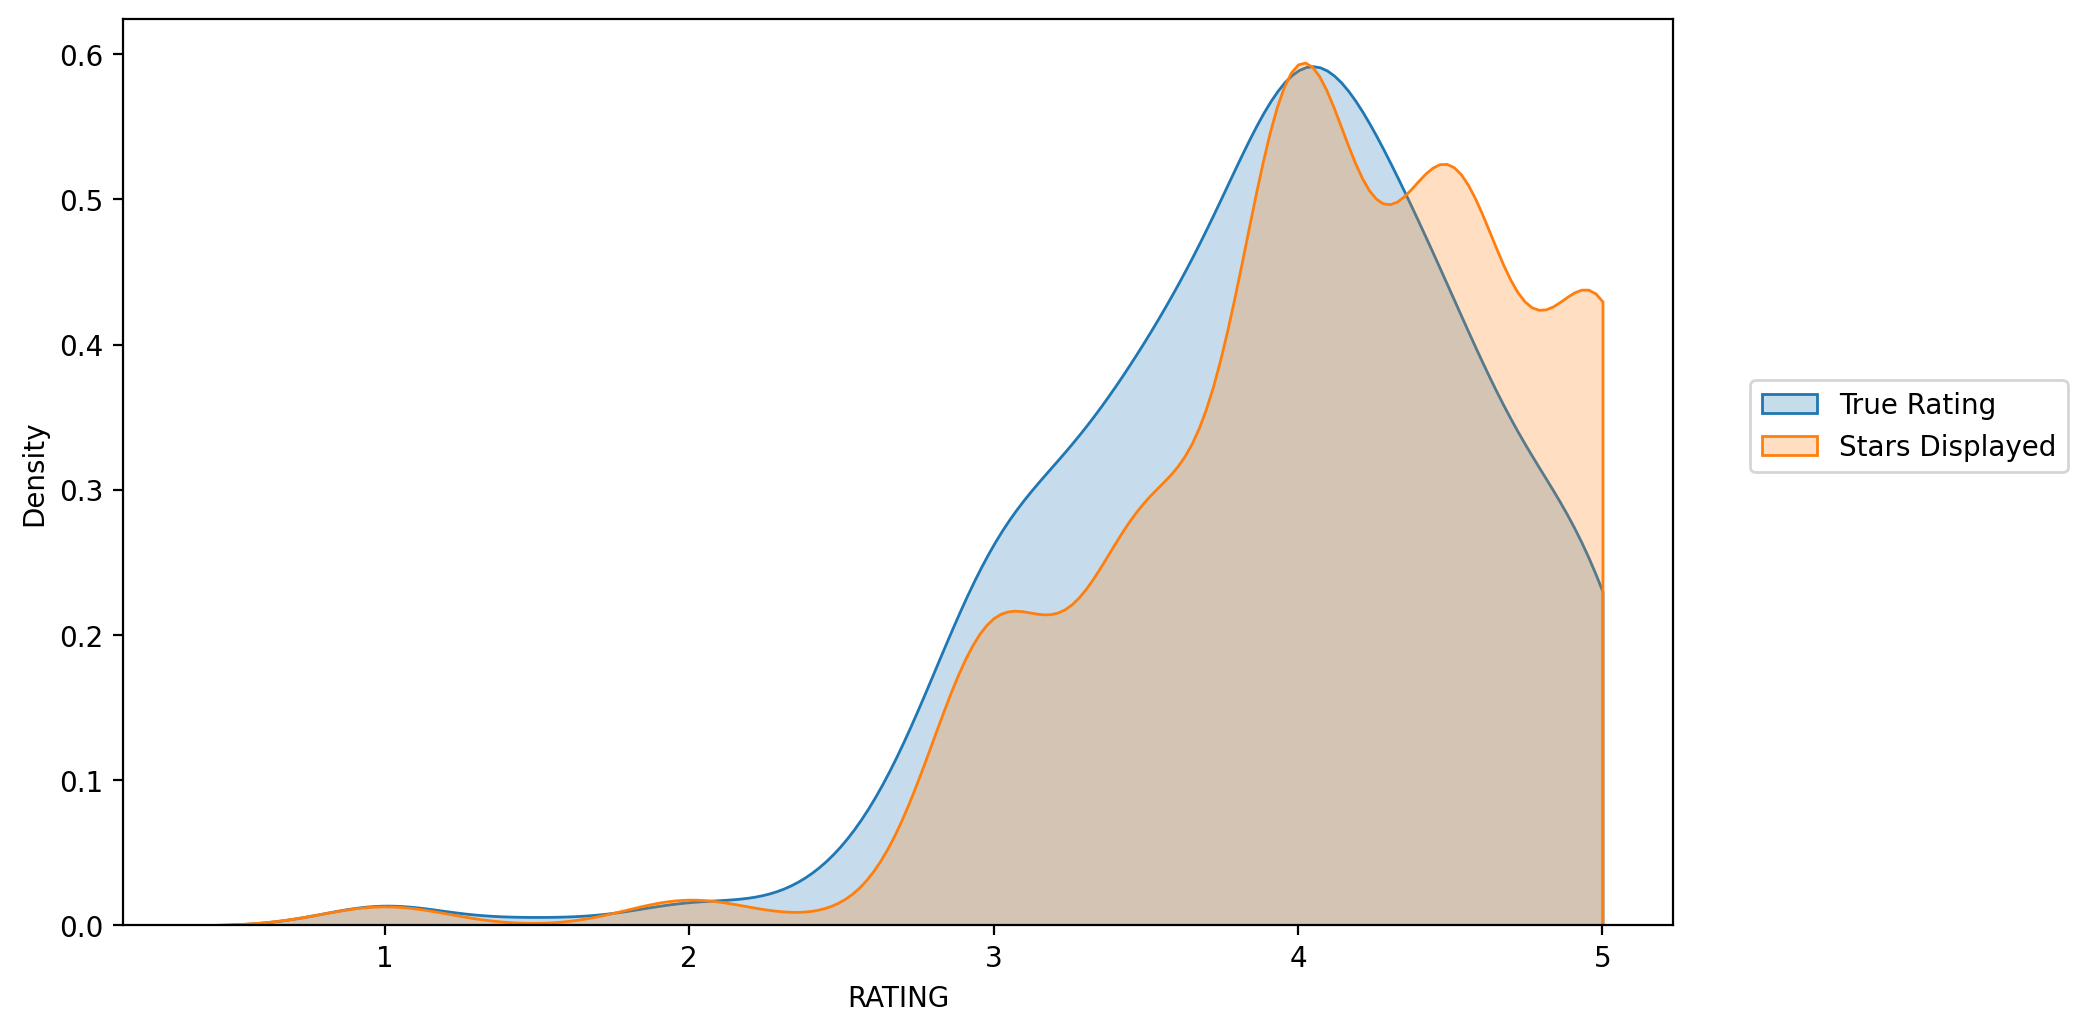

In [18]:
plt.figure(figsize=(10,6),dpi=200)
sns.kdeplot(data=fan_reviewed,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=fan_reviewed,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')
plt.legend(loc=(1.05,0.5))

**Let's now actually quantify this discrepancy.Create a new column of the different between STARS displayed versus true RATING. Calculating this difference with STARS-RATING and round these differences to the nearest decimal point**

In [19]:
fan_reviewed['STARS_DIFF']=fan_reviewed['STARS']-fan_reviewed['RATING']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
fan_reviewed['STARS_DIFF']= fan_reviewed['STARS_DIFF'].round(2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

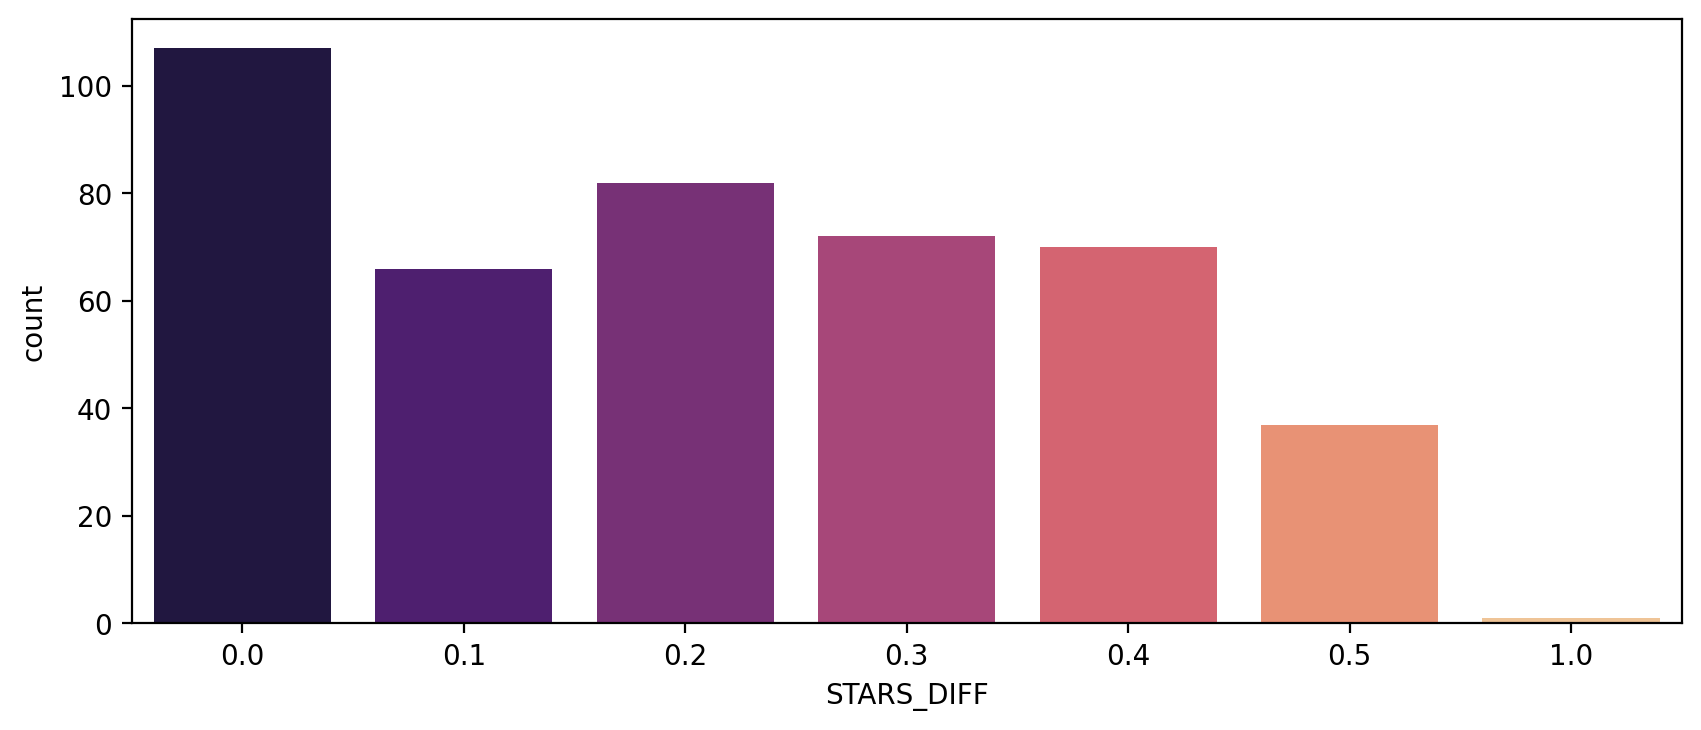

In [22]:

#cerating a countplot to display the  numbers of times a certain difference occurs
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=fan_reviewed,x='STARS_DIFF',palette='magma')

**showing the movie with having one star difference**

In [23]:
fan_reviewed[fan_reviewed['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


**Part Three: Comparision of Fandano  Ratings to other Sites**

Let's now compare the score from fandango to to  other movies sites and see how they compare.

**adding data "all_sites_csv"**

In [24]:
all_sites = pd.read_csv('../input/fandango-rating-discrepancy/all_sites_scores.csv')

In [25]:
#exploring dataframe
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [26]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [27]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


# Rotten Tomatoes

Let's first take a look at Rotten Tomatoes.RT has two set of reviews , their critics reviews(ratings published by official critics by official critics) and user reviews.

**Creating a scatterplot exploring the relationship between RT Critic reviews and RT User reviews**

(0.0, 105.0)

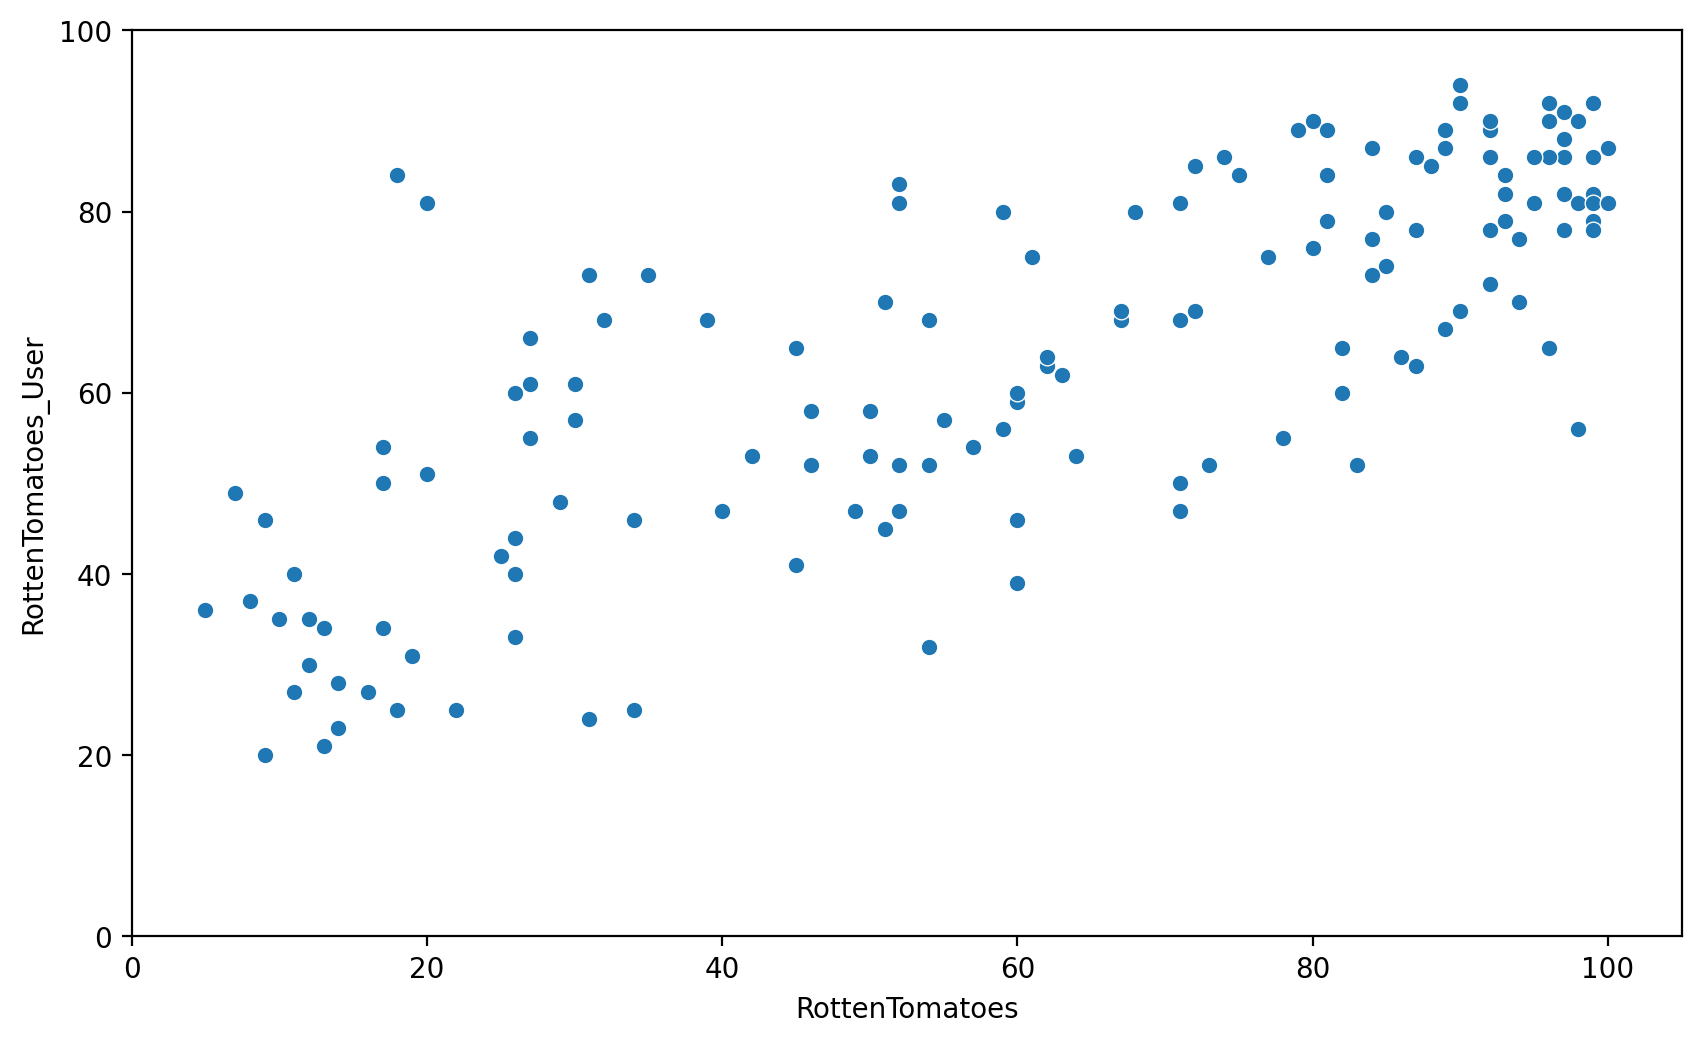

In [28]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.ylim(0,100)
plt.xlim(0,105)

Let's quantify this difference bt comparing the critics ratigns and the RT User ratings. We will calculate this with RottenTomatoes- RottenTomatoes-User.Note:Rotten_Diff here is critics-User Score .So value closer to 0 means aggrement between Critics and User Larger positive values means critics rated much higher than users.Larger negative values means users rated much higher than Critics.

**Creating new column based of the difference between critics ratings and user ratings for Rotten Tomatoes. Calculate this with RottenTomatoes-RottenTomatoes_User**

In [29]:
all_sites['Rotten_Diff']= all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']

Let's now compare the overall mean difference. Since We're dealing with difference that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

**Calculating the mean Absolute Difference between RT scores and RT User scores as described above.**

In [30]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

**Plotting the distribution of the difference between RT Critics Score and RT USer Score.**

Text(0.5, 1.0, 'RT Critics Score minus RT User Score')

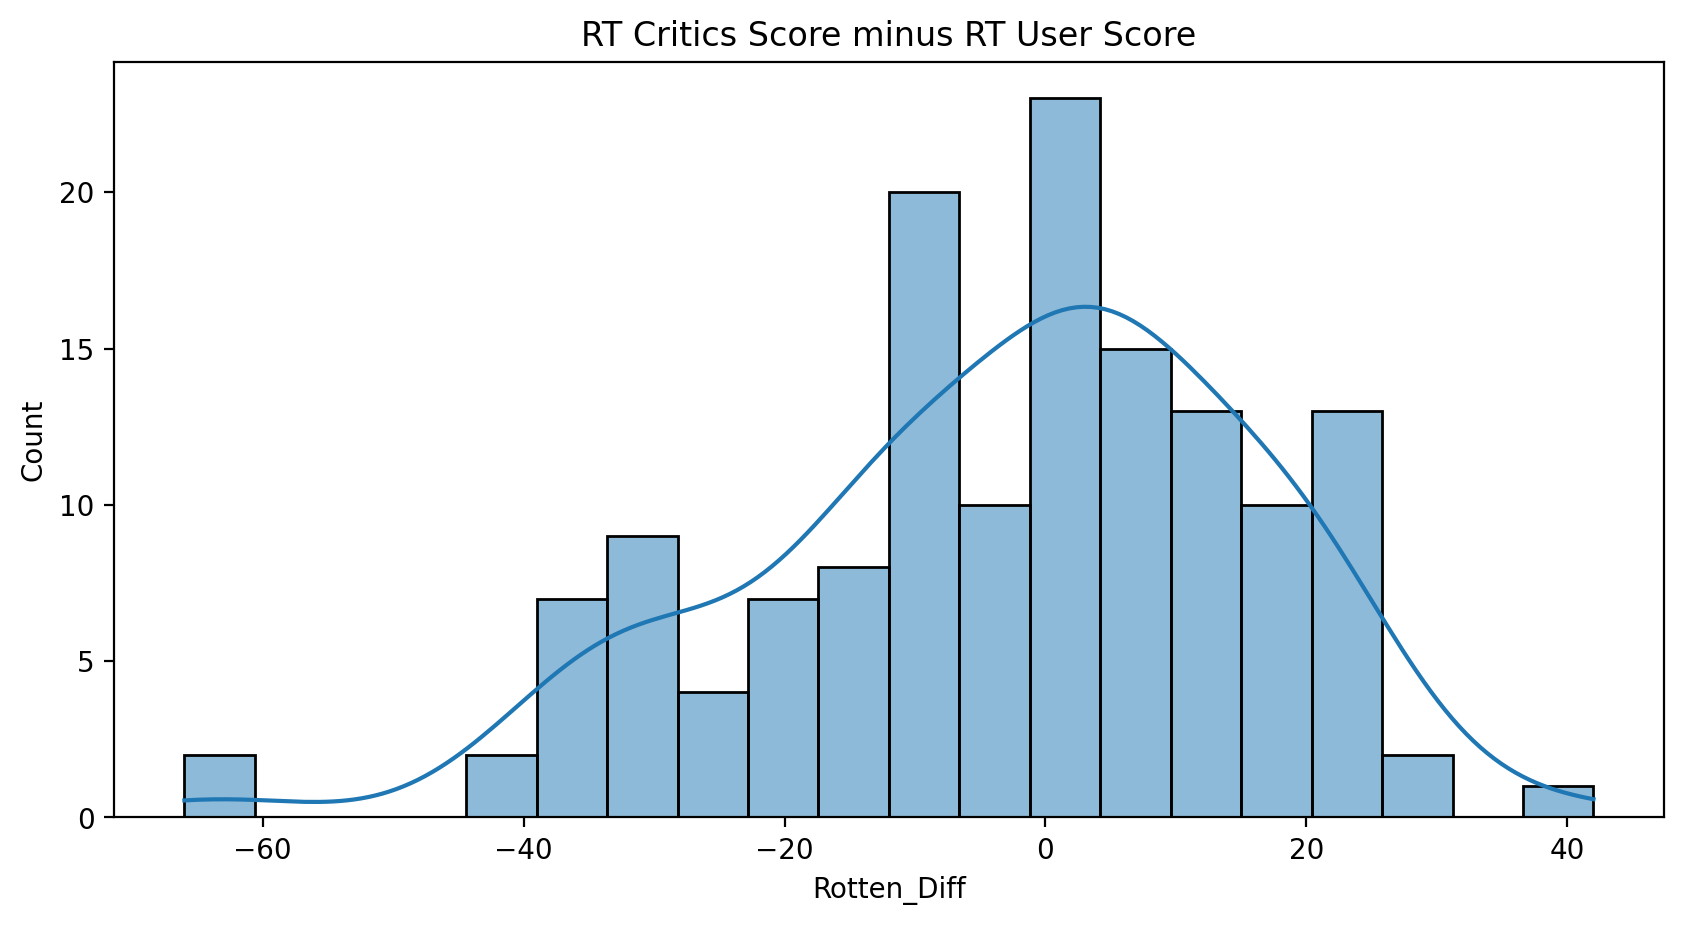

In [31]:

plt.figure(figsize=(10,5),dpi=200)
sns.histplot(data=all_sites,x='Rotten_Diff',kde=True,bins=20)
plt.title("RT Critics Score minus RT User Score")

**Plotting the distribution of the difference between RT Critics Score and RT User Score**

<AxesSubplot:xlabel='Rotten_Diff', ylabel='Count'>

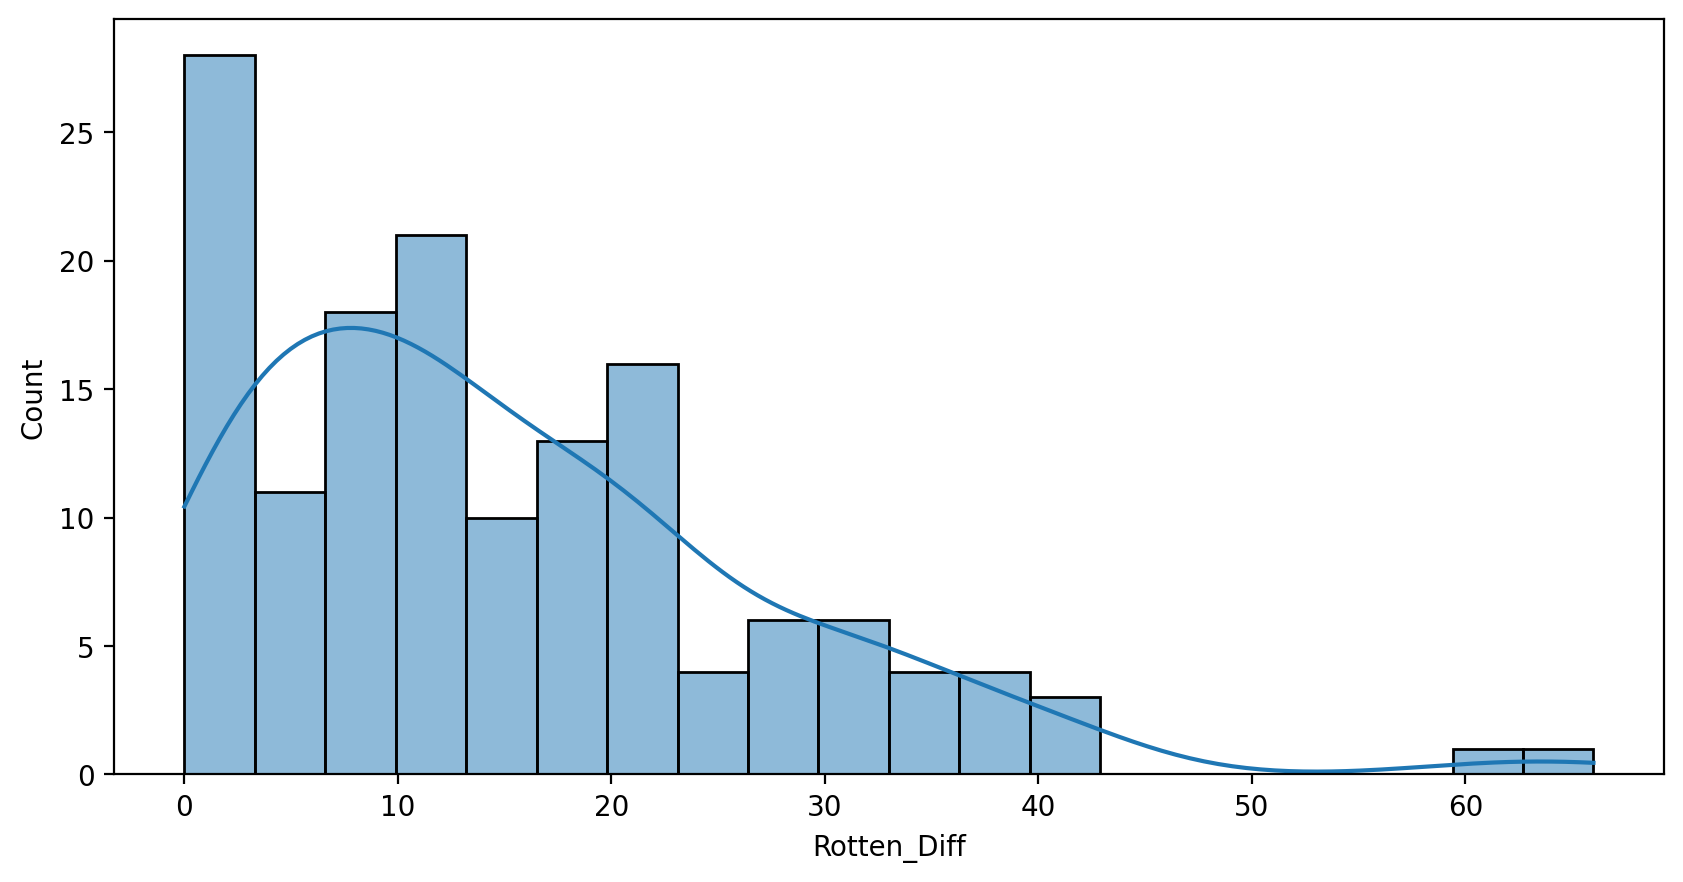

In [32]:
plt.figure(figsize=(10,5),dpi=200)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs),kde=True,bins=20)

**Let's find out which movies are causing the largest differnces.**

**Top 5 movies user rated higher than critics on average**

In [33]:
print('User love but Crtitcs Hates')
all_sites.nsmallest(5,'Rotten_Diff')['FILM']

User love but Crtitcs Hates


3         Do You Believe? (2015)
85             Little Boy (2015)
105      Hitman: Agent 47 (2015)
134      The Longest Ride (2015)
125    The Wedding Ringer (2015)
Name: FILM, dtype: object

In [34]:
print('Critics love, But User hates')
all_sites.nlargest(5,'Rotten_Diff')['FILM']

Critics love, But User hates


69                    Mr. Turner (2014)
112                   It Follows (2015)
115            While We're Young (2015)
37                 Welcome to Me (2015)
40     I'll See You In My Dreams (2015)
Name: FILM, dtype: object

# MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritcs also shown an average user rating versus their offical displayed rating

**Displaying a scatterplot of the MetaCritics Rating versus User Rating.**

(0.0, 100.0)

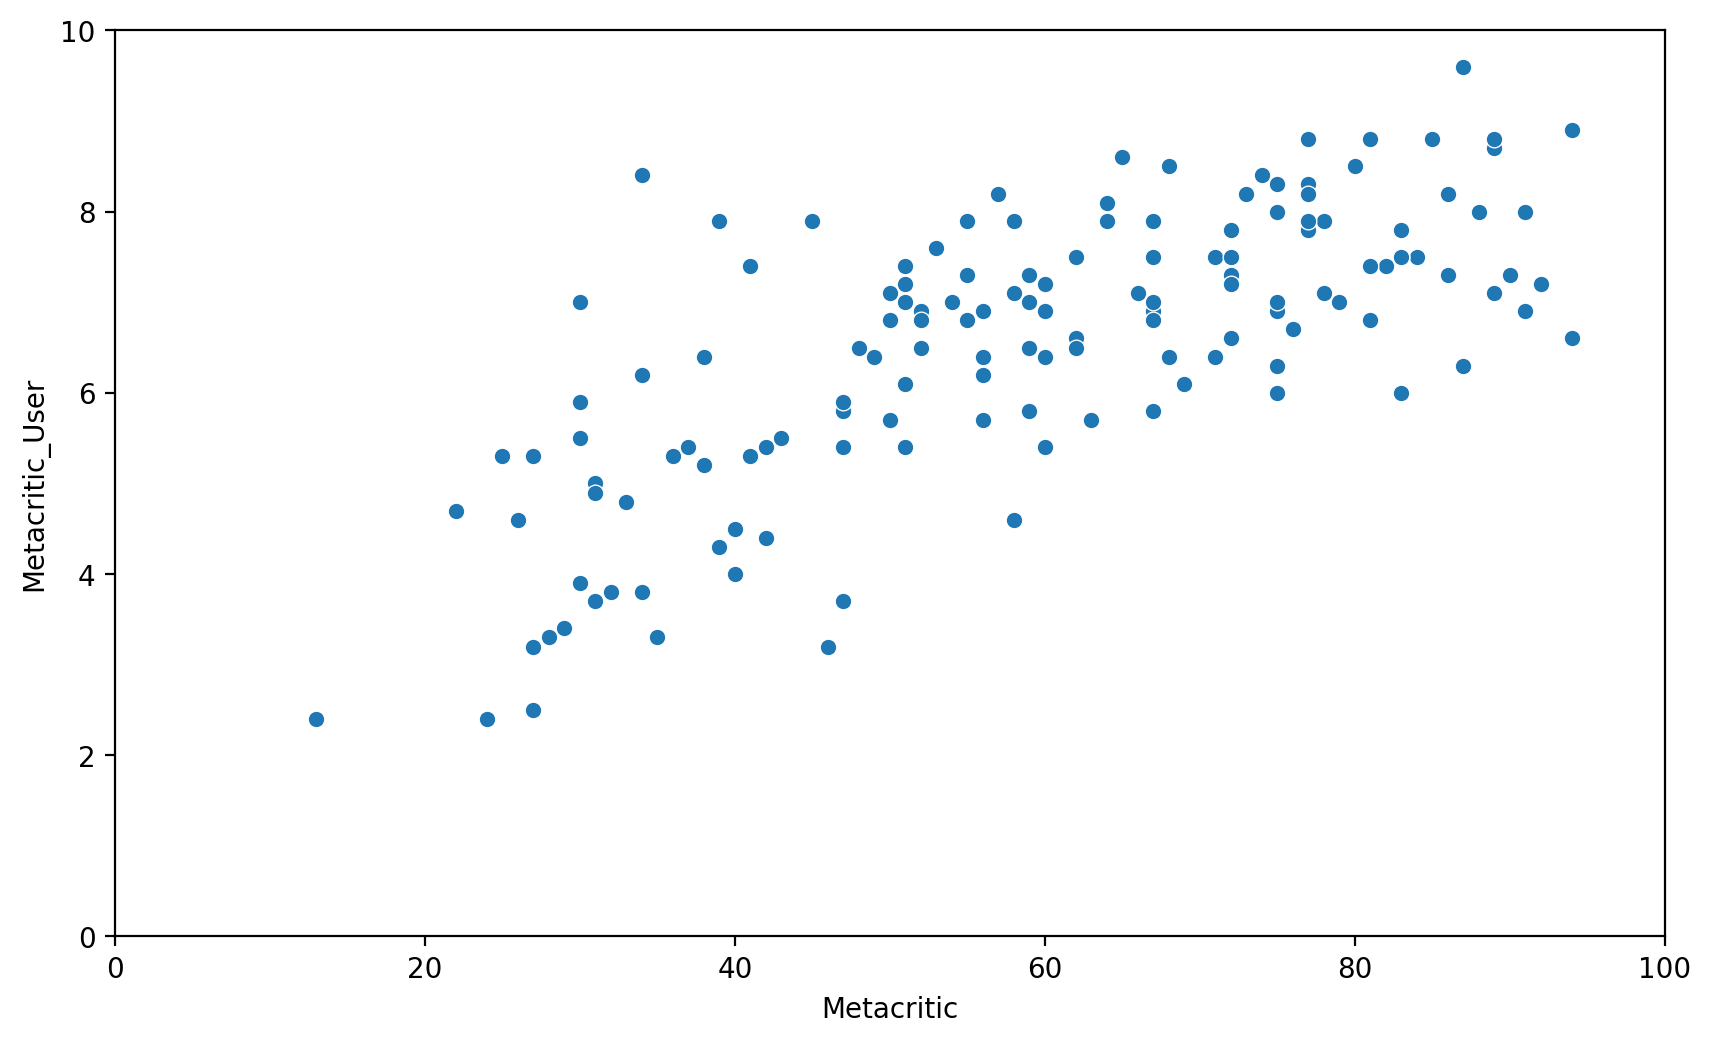

In [35]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')
plt.ylim(0,10)
plt.xlim(0,100)

# IMDB

Finally let's explore IMDB.Notice that both Metacritcs and IMDB report back vote counts.let's analyze the msot popular movies

**Creating a Scatterplot for the realtionship between vote on MetaCritic versus vote counts on IMDB.**

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

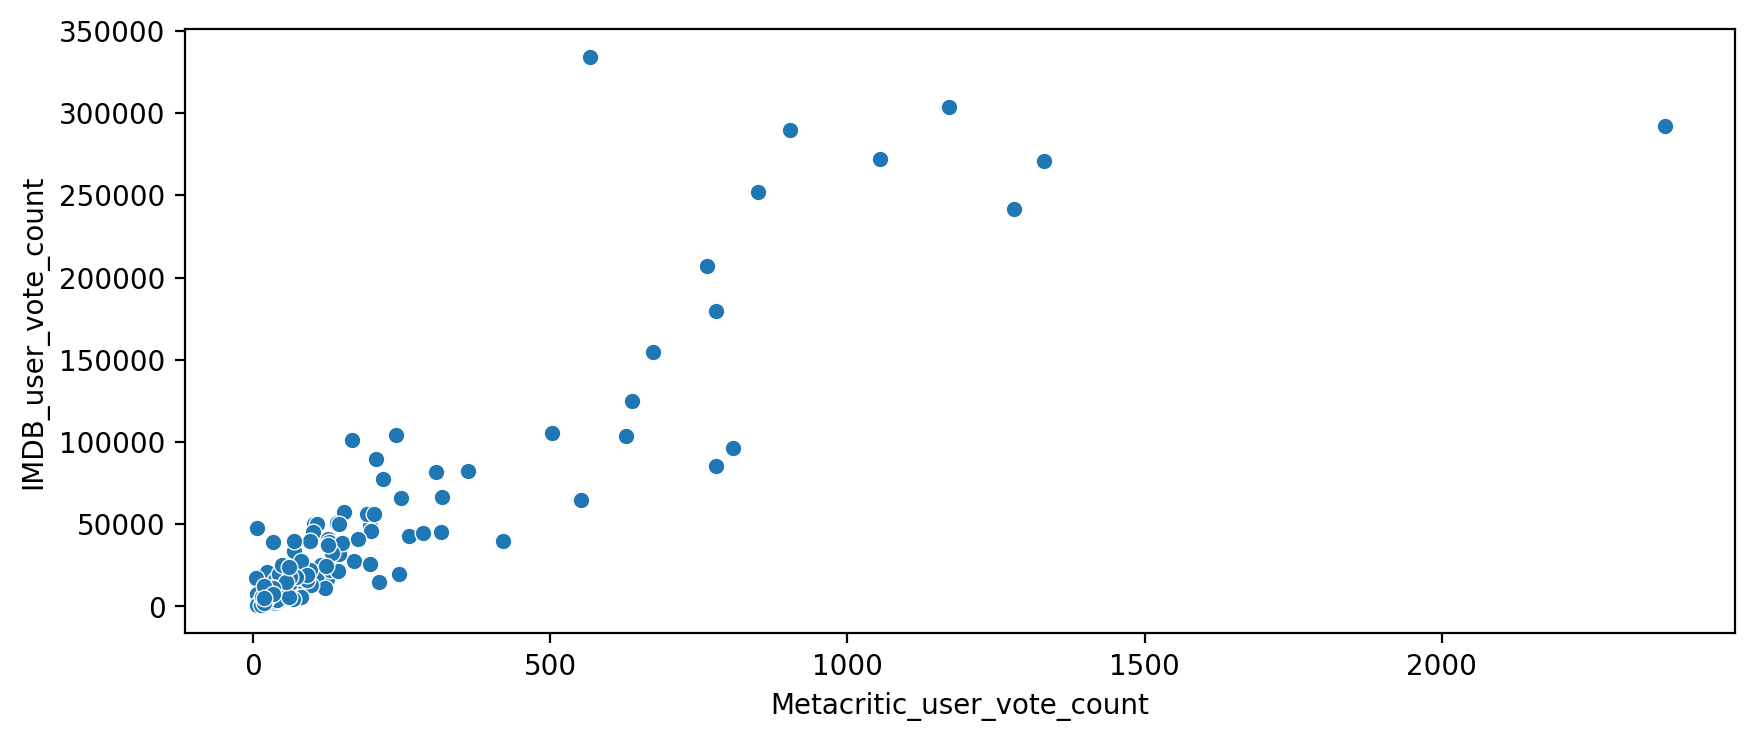

In [36]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

**There are two outliers here. The movie wih the highest vote count on IMDB on;y has about 500 Metacritcs ratings. What is this movie?**

In [37]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**Now check what movie has highest Metacritics user votes**

In [38]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


# Fandango Scores vs All Sites
 Finally let's begin to explore whether or not Fandango  artificially displays higher ratings than warranted to boost ticket sales.
 
 **Combining the Fandango Table with the ALL suts table. Not every movie in the fandango table is in the All sites table,Since some fandango movies have very little or no reviews.we only want to compare movies that are in both DataFrames, So doing an inner merge to merge togethher both DataFrames on the FILM columns.**

In [39]:
df = pd.merge(fandango,all_sites,on='FILM',how='inner')

In [40]:
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


# Normalizing the columns to fandango STARS and RATINGS 0-5

Notice that RT,MEtacritic, and Imdb don't use a score between  0-5 star like Fandango does. In order to do a fair comparision , we need to normalize these values so they all fall between 0-5 stars and the realationship between reviews stays the same

**Creating a new normlaizer column for all ratings so they match up within the 0-5 star range shown on Fandango. There are many ways to do this.**

In [41]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Diff                       42.0
Name: max, dtype: float64

In [42]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] = np.round(df['RottenTomatoes_User']/20,1)

In [43]:
df['Meta_Norm'] = np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] = np.round(df['Metacritic_User']/2,1)

In [44]:
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [45]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


**Now creating a norm_scores DataFrame that only contain the normalize ratings. include both STARS and Ratings from the original Fandango Table.**

In [46]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten_Diff',
       'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm'],
      dtype='object')

In [47]:
norm_scores  =df[['STARS','RATING','RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm','IMDB_Norm']]

In [48]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


# Comparing Distribution of Scores Across Sites

Now the moment og the truth! Does Fandango higher than STARS , but are the rating themselves higher than average?

**Creating a plot Comparing the distribution of normalized ratings across all sites.**

In [49]:
#custom fucntion for positioning legend
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

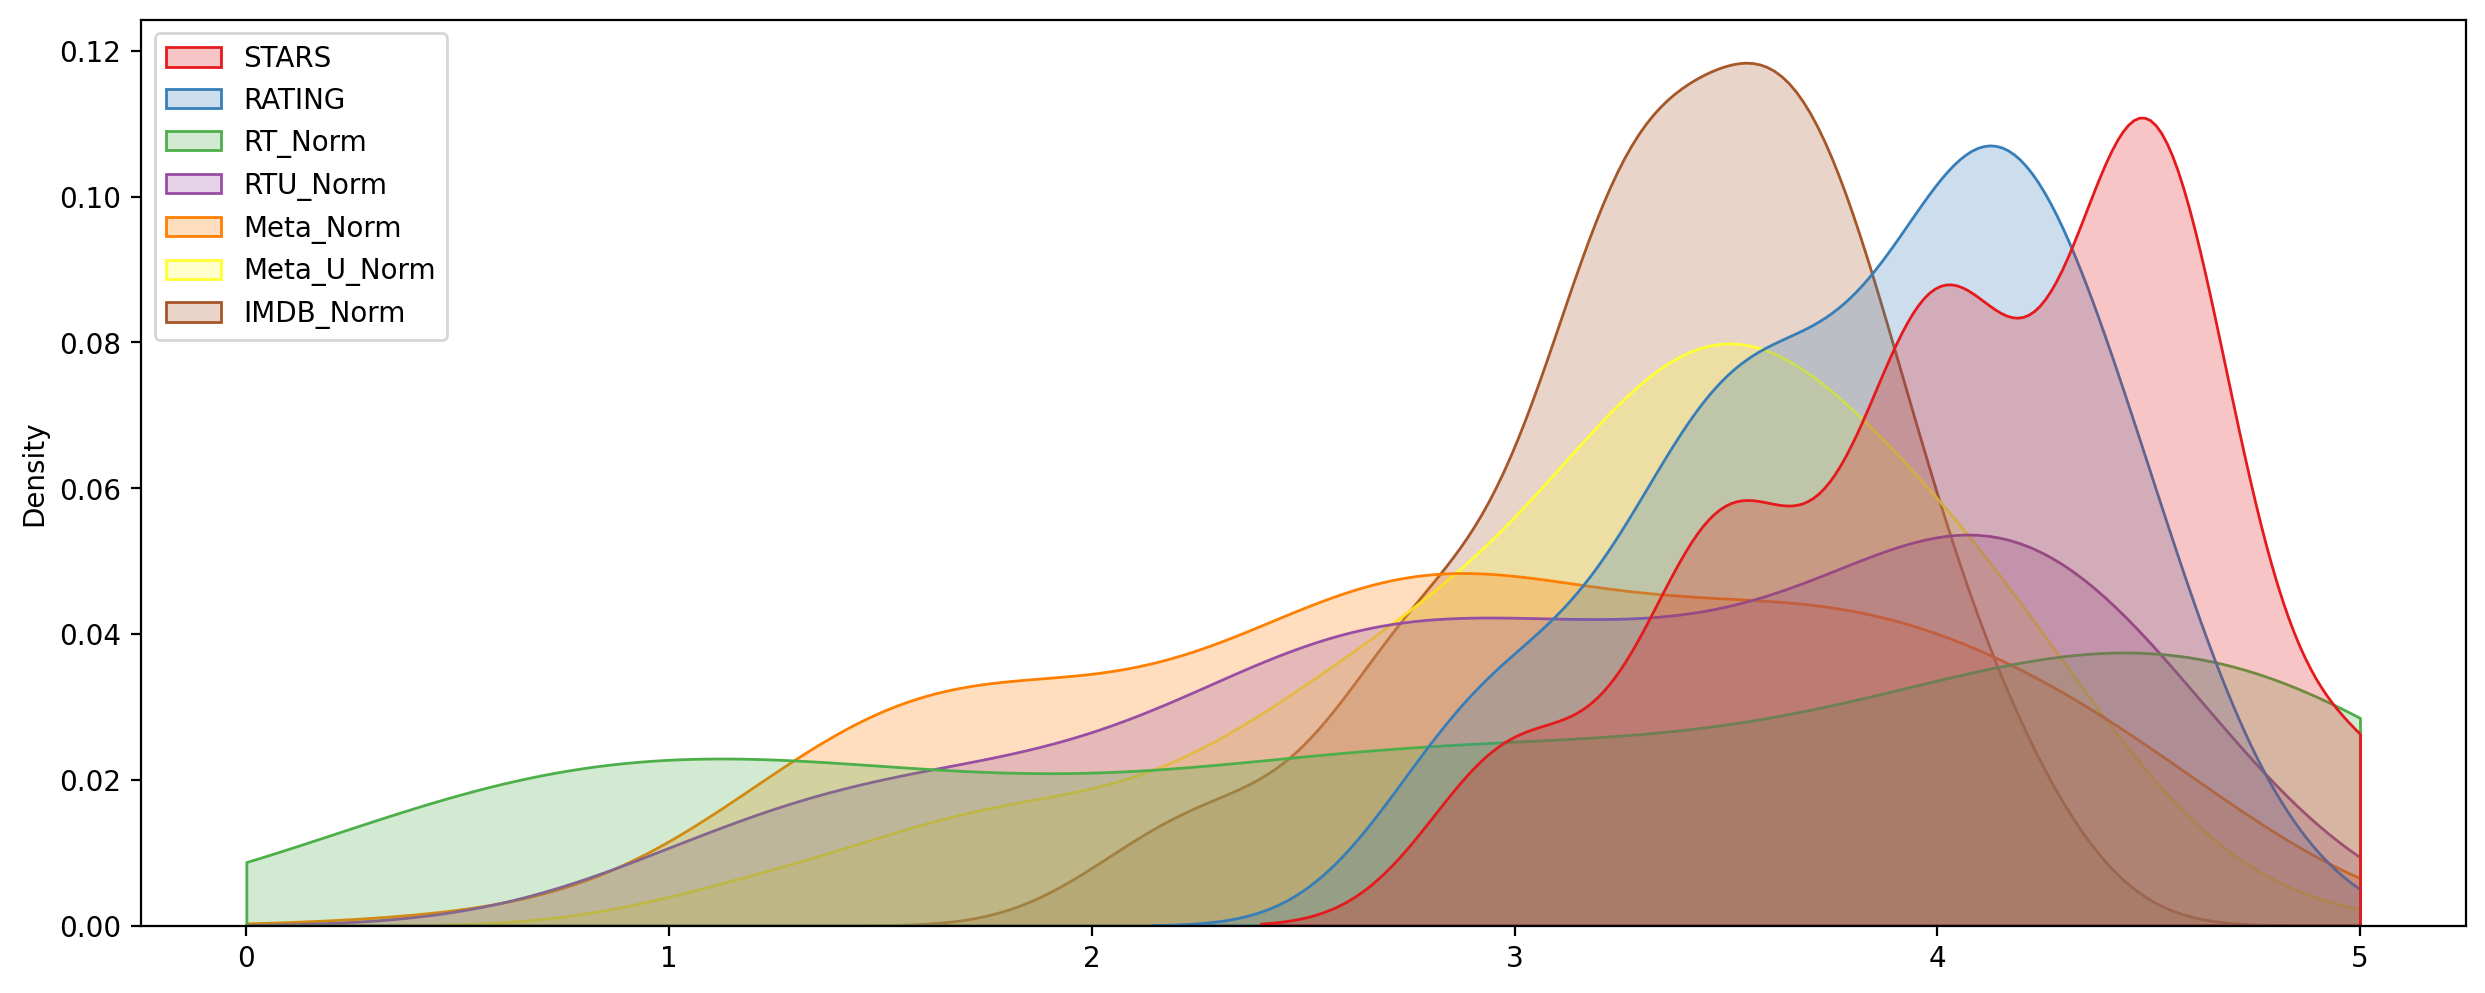

In [50]:
fig,ax = plt.subplots(figsize=(15,6),dpi=200)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1')

move_legend(ax, "upper left")

**Clearly fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.**

**Creating a Kde plot that compare the distribution of RT critic ratings afainst the STARS displayed by Fandango**

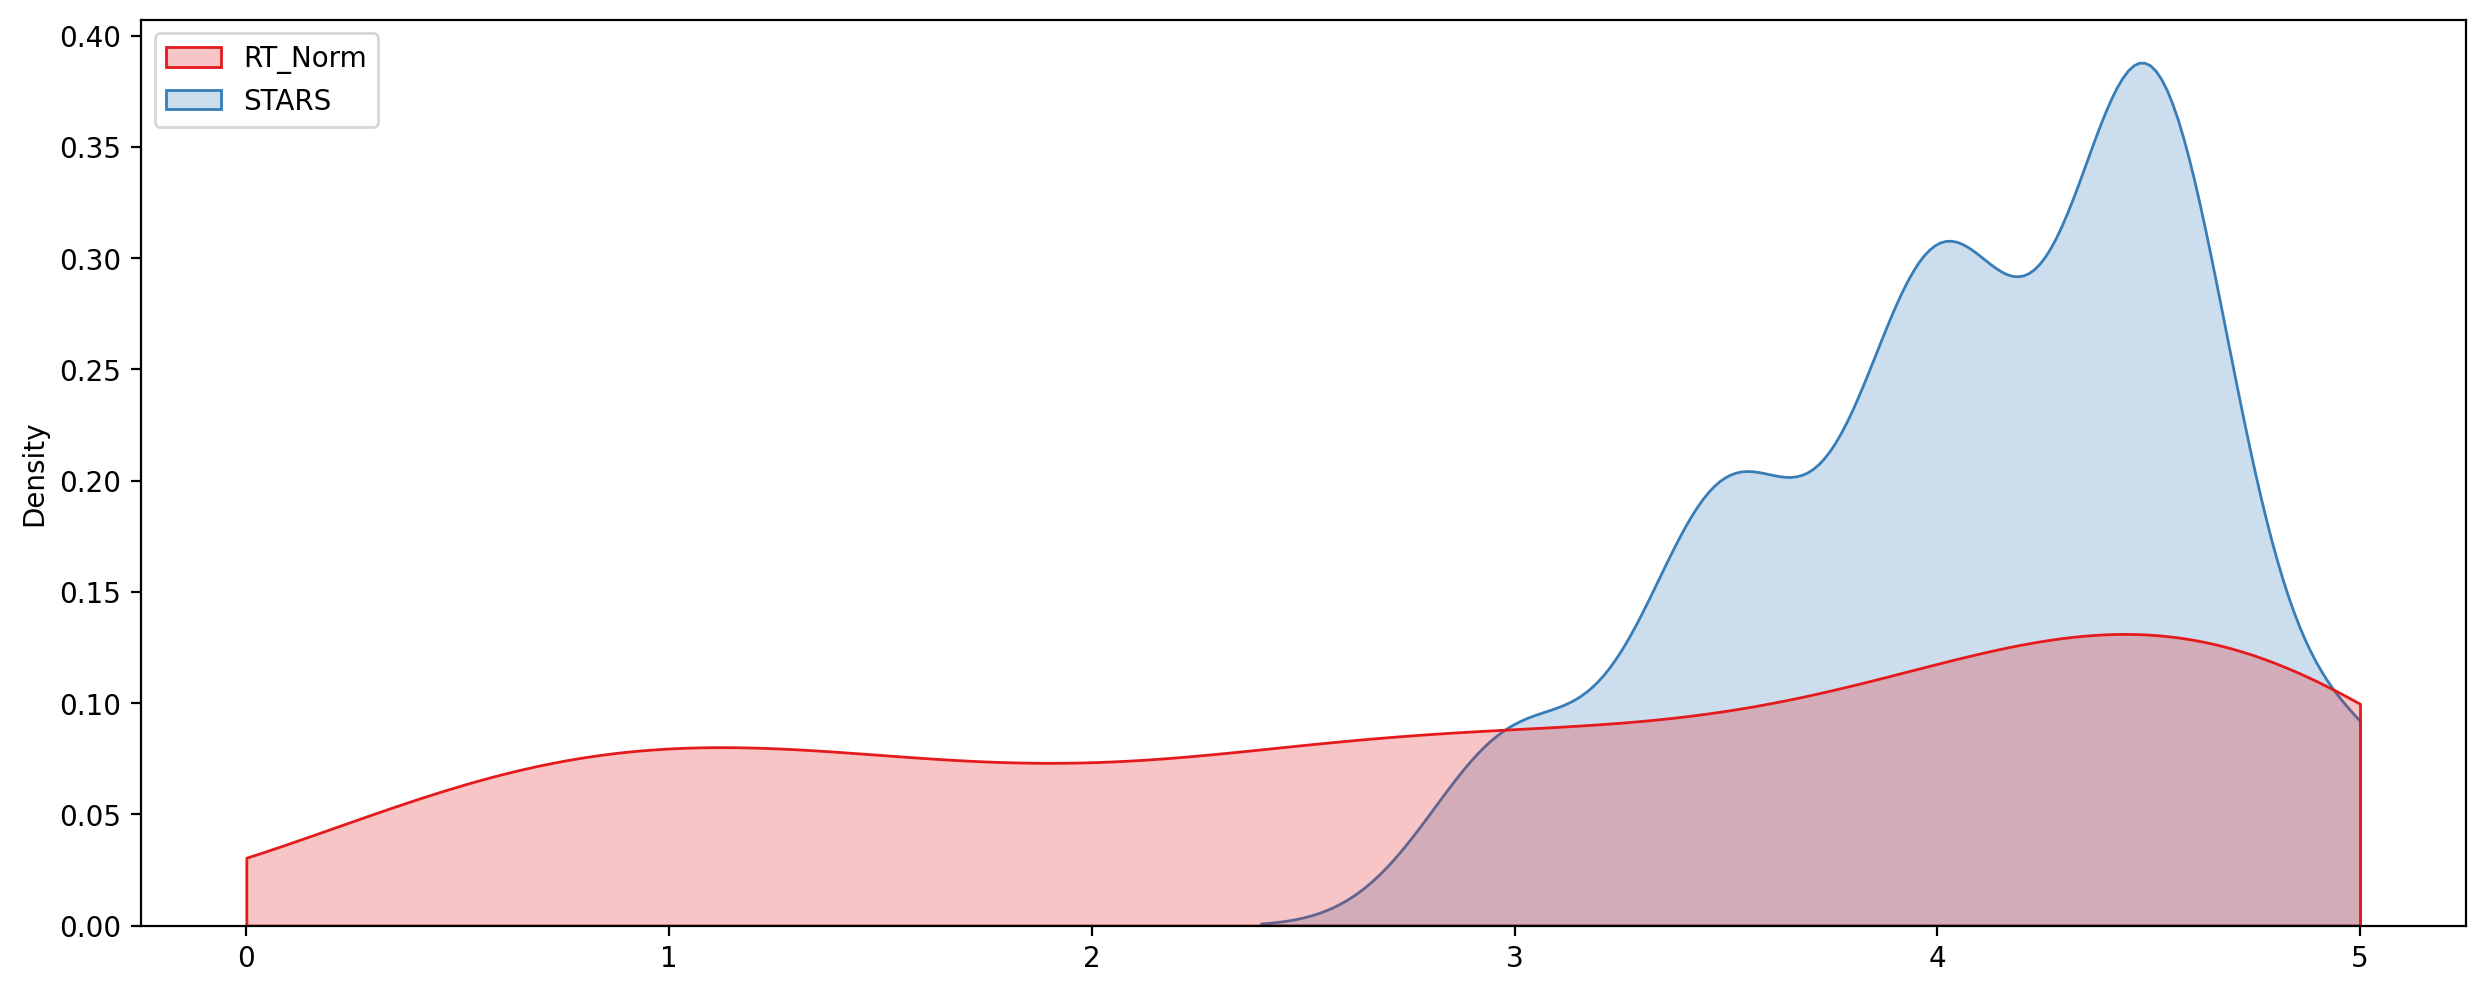

In [51]:
fig,ax = plt.subplots(figsize=(15,6),dpi=200)
sns.kdeplot(data=norm_scores[['RT_Norm','STARS']],clip=[0,5],shade=True,palette='Set1')

move_legend(ax, "upper left")

**Creating a histogram comparing all normalized score**

<AxesSubplot:ylabel='Count'>

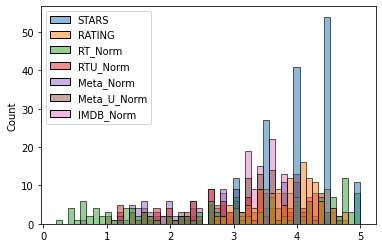

In [52]:
sns.histplot(norm_scores,bins=50)

# what are the worst movies rated across all platforms?

**Creating a clustermap visualisation of all normalized scores. Note the differene in  highly rated movies versus poorly rated movies.**

<Figure size 3500x2000 with 0 Axes>

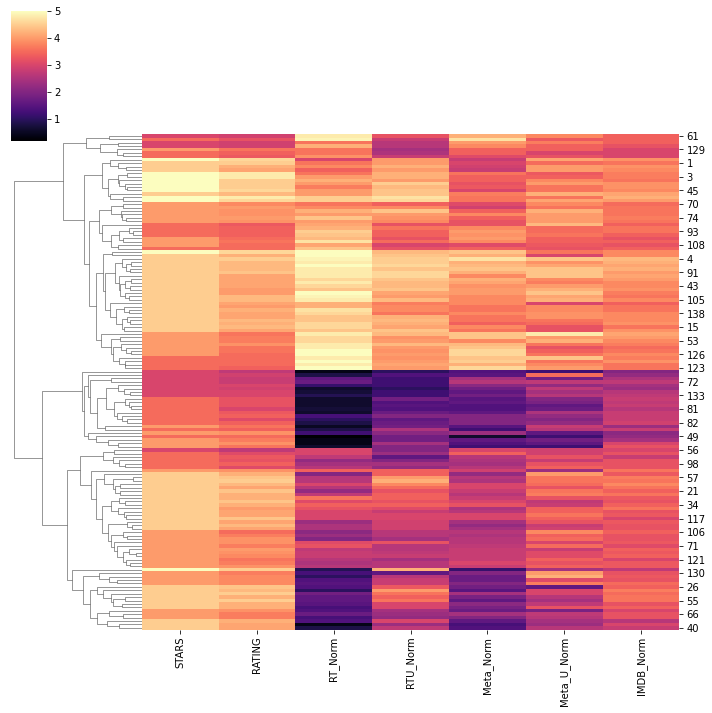

In [53]:
plt.figure(figsize=(14,8),dpi=250)
sns.clustermap(norm_scores,cmap='magma',col_cluster=False)

**clearly Fandago is rating movies much higher than other sites,especially considering that it is then displaying a rounded up version of the rating. Let's examine the top 10 worst movies . Bsed off the Rotten TOmatoes Critic rating, What are the top 10 lowest rated movies?what aare the normalized scores across all the platforms for these movies? You may ned to add the FILM column back in to your DataFrame of normalized scores to see the results**

In [54]:
norm_scores.columns

Index(['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm',
       'IMDB_Norm'],
      dtype='object')

In [55]:
norm_films =df[['FILM','STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm',
       'IMDB_Norm']]

In [56]:
worst_films = norm_films.nsmallest(10,'RT_Norm')

# Final 

**Visualizing the distribution of ratings across all sites for the top 10 worst movies.**

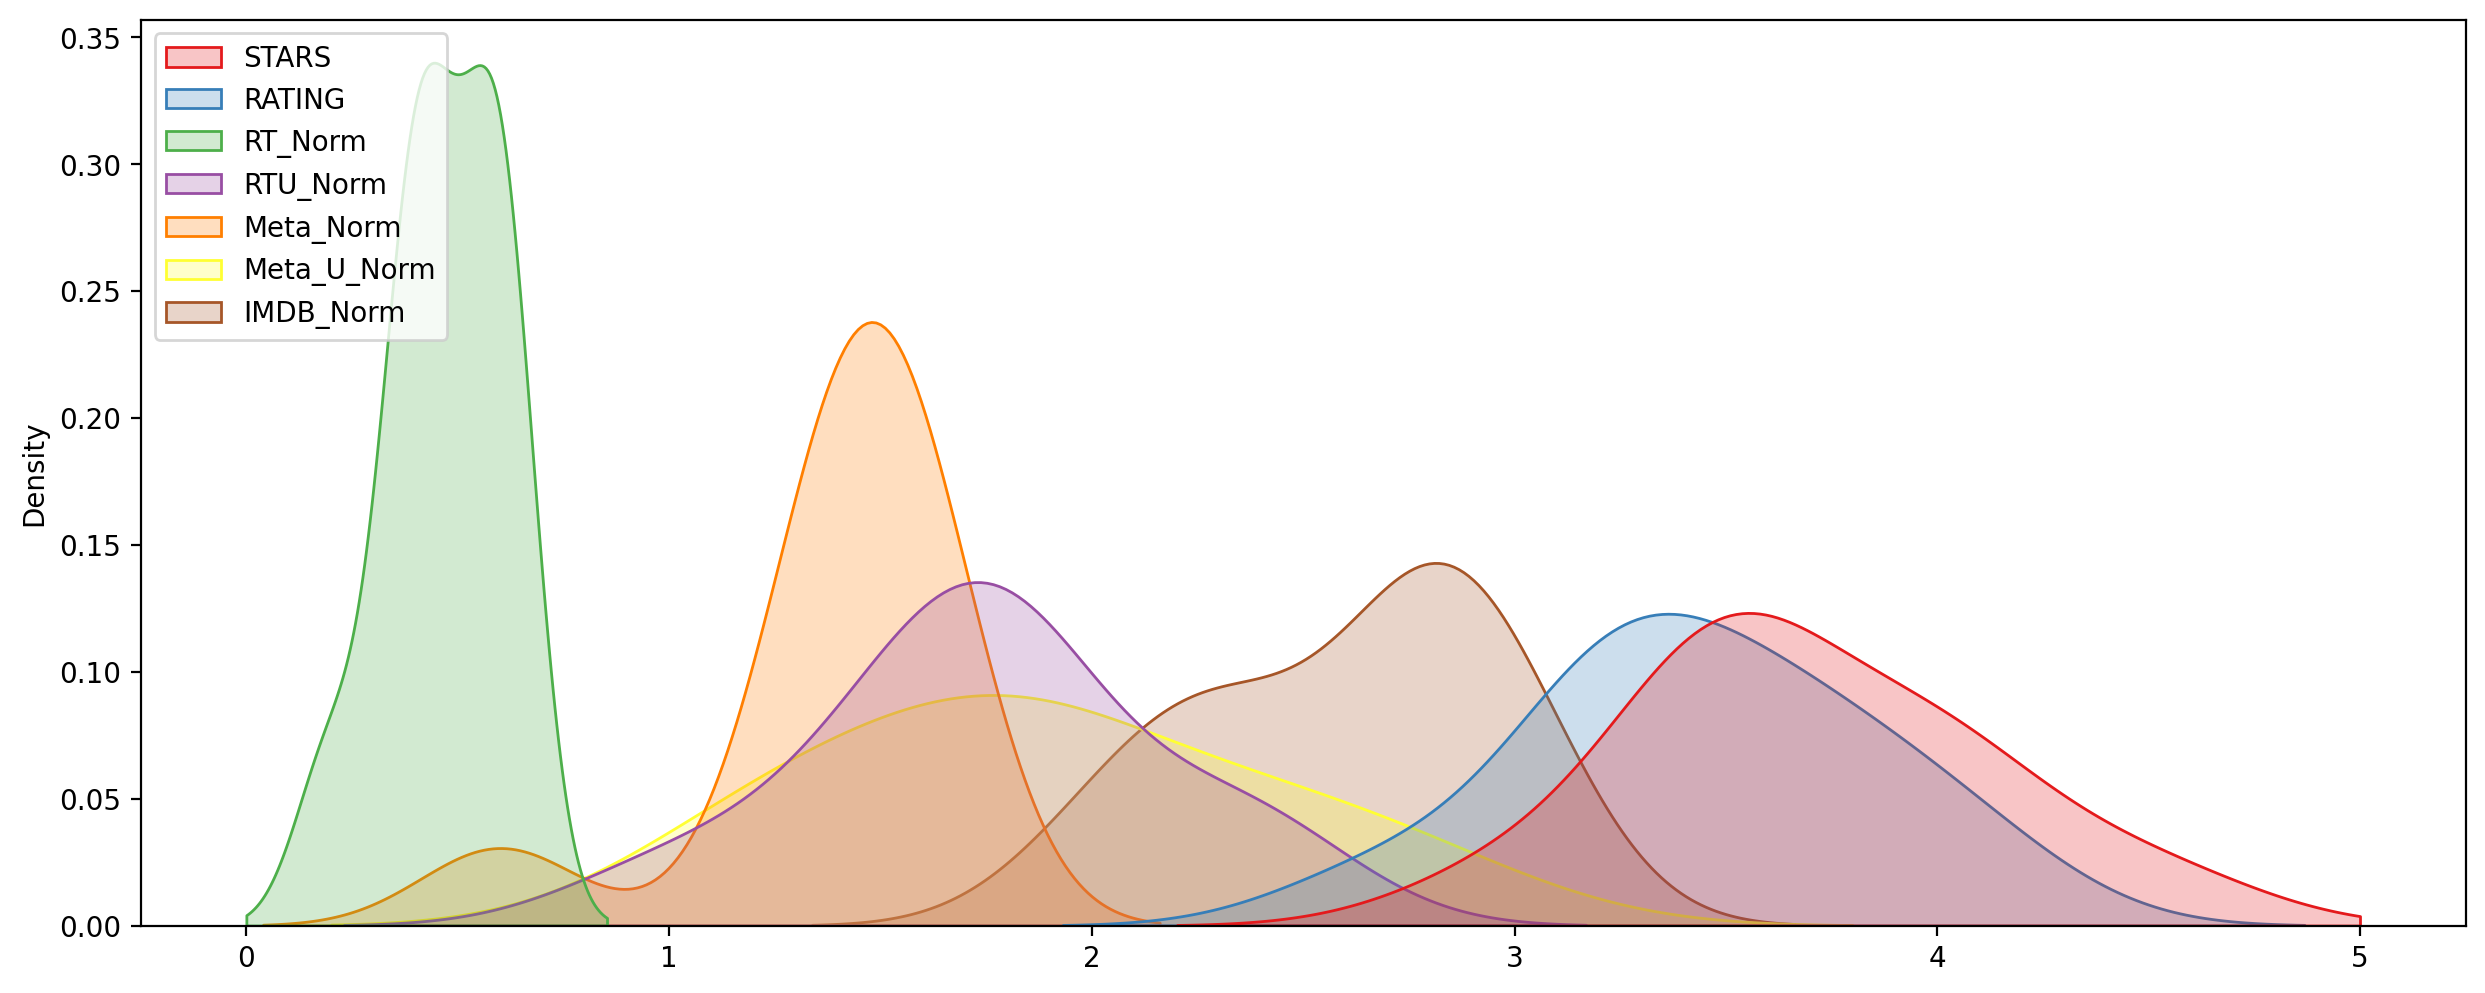

In [57]:
fig,ax = plt.subplots(figsize=(15,6),dpi=200)
sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1')

move_legend(ax, "upper left")